## **Exercise 1: Importing Libraries and Loading Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg","cyclinders","displacement","horsepower","weight","accleration","model year","origin"]
auto_mpg = pd.read_csv(url, names=column_names, na_values="?", skipinitialspace = True, comment = "\t", sep=" ")
print(auto_mpg.head())

    mpg  cyclinders  displacement  horsepower  weight  accleration  \
0  18.0           8         307.0       130.0  3504.0         12.0   
1  15.0           8         350.0       165.0  3693.0         11.5   
2  18.0           8         318.0       150.0  3436.0         11.0   
3  16.0           8         304.0       150.0  3433.0         12.0   
4  17.0           8         302.0       140.0  3449.0         10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


## **Exercise 2: Data Pre-processing**

In [3]:
# Data Cleaning
auto_mpg.drop_duplicates(inplace = True)
auto_mpg.fillna(auto_mpg.mean(), inplace=True)

## **Exercise 3: Simple Linear Regression**

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x = auto_mpg["horsepower"].values.reshape(-1,1)
y = auto_mpg["mpg"].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [5]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [6]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [7]:
# Evaluate the performance of the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R-Squared: ",r2)

R-Squared:  0.6727644217654596


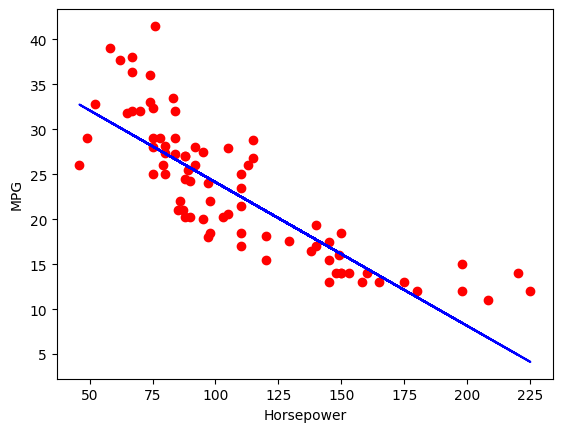

In [8]:
# Visualize the model
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_pred, color = "blue")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

## **Exercise 4: Multiple Linear Regression**


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x = auto_mpg.drop("mpg",axis=1)
y = auto_mpg["mpg"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [10]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [12]:
# Evaluate the performance of the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R-Squared: ",r2)

R-Squared:  0.8641793068605387


In [13]:
# Coefficients
coefficients = pd.DataFrame(regressor.coef_, x_train.columns, columns=["Coefficient"])
print(coefficients)

              Coefficient
cyclinders      -0.277356
displacement     0.017758
horsepower      -0.014746
weight          -0.006734
accleration      0.113209
model year       0.794917
origin           1.324818


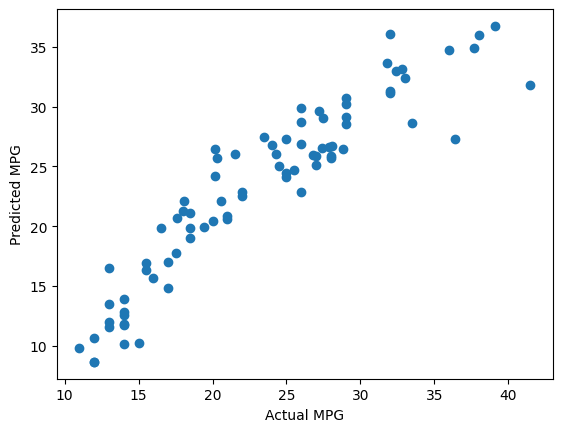

In [14]:
# Visualize the model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

## **Exercise 5: Polynomial Regression**

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x = auto_mpg["horsepower"].values.reshape(-1,1)
y = auto_mpg["mpg"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [16]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_train_poly,y_train)

LinearRegression()

In [17]:
# Predicting the Test set results
y_pred_poly = lin_reg_2.predict(x_test_poly)

In [18]:
# Evaluate the performance of the model
from sklearn.metrics import r2_score
r2_poly = r2_score(y_test,y_pred_poly)
print("R-Squared: ",r2_poly)

R-Squared:  0.720295016018885


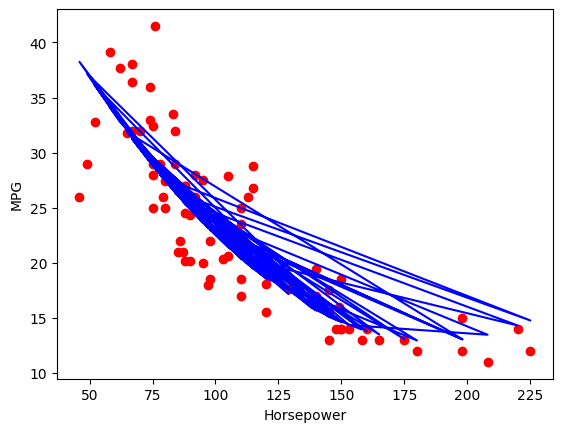

In [19]:
# Visualize the model
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_pred_poly, color = "blue")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()


## **Exercise 6: Model Comparison**


In [ ]:
'''
To compare the performance of the simple linear regression, multiple linear regression, and polynomial regression models, we will use the R-squared value as a measure of how well each model fits the data.

In simple linear regression model, uses only one predictor variable, 'horsepower', to predict the target variable 'mpg'. The R-squared value for the simple linear regression model is 0.673.

In multiple linear regression model uses several predictor variables, 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', and 'origin', to predict the target variable 'mpg'. 
The R-squared value for the multiple linear regression model is 0.864.

In polynomial regression model uses the 'horsepower' column as our predictor variable and the 'mpg' column as our target variable, transformed to higher degrees. We used a degree of 2 in this case. 
The R-squared value for the polynomial regression model is 0.720.

From these results, we can see that the multiple linear regression model performs the best on the given dataset, with the highest R-squared value of 0.864.
'''

In [ ]:
'''
# Pros and Cons
Simple Linear Model is easy to interpret, but it may not capture all the complexities of the data. 

Multiple Linear Regression Model can incorporate multiple predictor variables and can provide a more accurate prediction, but it may also be more prone to overfitting if too many variables are included. 

Polynomial Regression model can capture more complex relationships between the predictor and target variables, but it may be more prone to overfitting if the degree is too high, and it can be more difficult to interpret.
'''